In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
fullness_assessments = pd.read_csv("/Users/ishan/Downloads/fullness-assessments CCDS as of Oct 13 2023.csv")
scale_records = pd.read_csv("/Users/ishan/Downloads/Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv")

## Data Explanation and feature descriptions
We have two datasets:
- scale_records: Contains information related to weight measurements for bins
- fullness_assessments: Contains visual assessments of bin fullness.

Weight
- **Outliers/Errors**: min/max values of -100,000g and +100,000g suggesting outliers/errors
- **Average**: average weight is 3,965g
- **Spread**: Large variation in weight data with a SD of 7,578g

Battery Levels
- **Range:** The battery levels range from a minimum of approximately 1,334.9 to a maximum of approximately 3,251.2
- **Average:** The average battery level is approximately 2,891
- **Spread:** The variation in the battery data is relatively low, with a standard deviation of approximately 158.4

In [69]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)       # Set display width


# Display the first few rows of each dataset
print(scale_records.shape)
print(scale_records.head())
print("************************************************************************************************************************")
print(fullness_assessments.shape)
print(fullness_assessments.head())
print("************************************************************************************************************************")
# Summary statistics for the datasets
print(scale_records.describe())
print("************************************************************************************************************************")
print(fullness_assessments.describe())

(26979124, 12)
                 createdat        iotid   hide                                   bin errorcode        weight      battery                updatedat  weightdiff  year  month  day
0  2023-01-02 12:41:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2596.017395  2023-01-02 12:41:00.000         NaN  2023      1    2
1  2023-01-02 13:02:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2595.101854  2023-01-02 13:02:00.000         NaN  2023      1    2
2  2023-01-02 13:53:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2596.169986  2023-01-02 13:53:00.000         NaN  2023      1    2
3  2023-01-02 16:30:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2595.559625  2023-01-02 16:30:00.000         NaN  2023      1    2
4  2023-01-02 16:39:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  1410

In [4]:
scale_records.head(5)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00.000,NaN,2023,1,2
1,2023-01-02 13:02:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00.000,NaN,2023,1,2
2,2023-01-02 13:53:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00.000,NaN,2023,1,2
3,2023-01-02 16:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00.000,NaN,2023,1,2
4,2023-01-02 16:39:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00.000,NaN,2023,1,2


## Cleaning

- Removed 11.6M duplicates
- No missing values

In [4]:
scale_records.isna().sum()

createdat            0
iotid                0
hide                 0
bin                  0
errorcode            0
weight               0
battery              0
updatedat            0
weightdiff    26979124
year                 0
month                0
day                  0
dtype: int64

In [23]:
duplicates = scale_records[scale_records.duplicated()]
duplicates.shape # 11.6M Duplicates

(11684870, 12)

In [24]:
scale_records_clean = scale_records.drop_duplicates()

## Bin Profiling
- There are 1,188 unique bins on 17 Floors in CDS building
- Categories of bins in a station are Trash, Mixed Recycling, Compost
- Scales can have upto 6 bins under its realm

In [7]:
# Unique bins in scale_records
print(scale_records_clean['bin'].nunique())

# Find total counts for columns
for col in fullness_assessments.columns:
    print(f"Value counts for {col}:\n")
    print(fullness_assessments[col].value_counts())
    print("\n" + "="*50 + "\n")  # Separator for better readability

# Find unique counts for columns
for col in fullness_assessments.columns:
    print(f"Unique counts for {col}:\n")
    print(fullness_assessments[col].nunique())
    print("\n" + "="*50 + "\n")  # Separator for better readability


1188
Value counts for bin:

bin
c77d993f-cc97-4091-abd7-377aa5650772    11
684d7454-1c8f-48cf-832f-e4823b4edfe3    10
bba5cb9c-68e8-405d-875a-67830049b9f6    10
8a9fc204-ec51-4701-a2fa-51ba69912676    10
106c67a4-8f4e-4373-b850-68f54341bde0    10
                                        ..
60543c62-15ea-44e4-be96-252f31d9b424     1
0c48f73e-287c-4dca-83a9-f7951cbb21f2     1
b66147b1-c78c-4951-9795-0de008ff9b6b     1
928dcb87-0743-4361-aefe-56204e423f25     1
feccf170-8ed4-4c06-b7d8-c4d788d58369     1
Name: count, Length: 219, dtype: int64


Value counts for date:

date
2023-09-13T15:35:37-04:00    3
2023-09-29T14:40:37-04:00    3
2023-10-12T13:14:24-04:00    3
2023-09-28T14:41:29-04:00    3
2023-09-28T14:34:05-04:00    3
                            ..
2023-10-05T12:37:18-04:00    1
2023-10-05T12:40:10-04:00    1
2023-10-05T13:24:32-04:00    1
2023-10-05T13:07:23-04:00    1
2023-10-13T14:27:00-04:00    1
Name: count, Length: 527, dtype: int64


Value counts for account:

account
BU CCDS 

In [8]:

# Group by 'iotid' and count unique 'bin' values for each 'iotid'
unique_bins_per_iotid = scale_records_clean.groupby('iotid')['bin'].nunique()

# Check if each 'iotid' has only one unique 'bin' associated with it
is_one_to_one_mapping = all(unique_bins_per_iotid == 1)

print(unique_bins_per_iotid.sort_values(ascending=False))

iotid
lora-001610    6
lora-000067    5
lora-000152    4
lora-000143    4
lora-000054    4
              ..
lora-000484    1
lora-000485    1
lora-000486    1
lora-000487    1
lora-001825    1
Name: bin, Length: 1090, dtype: int64


**Let's plot the weight of a random bin for one week to understand how it looks over time.**

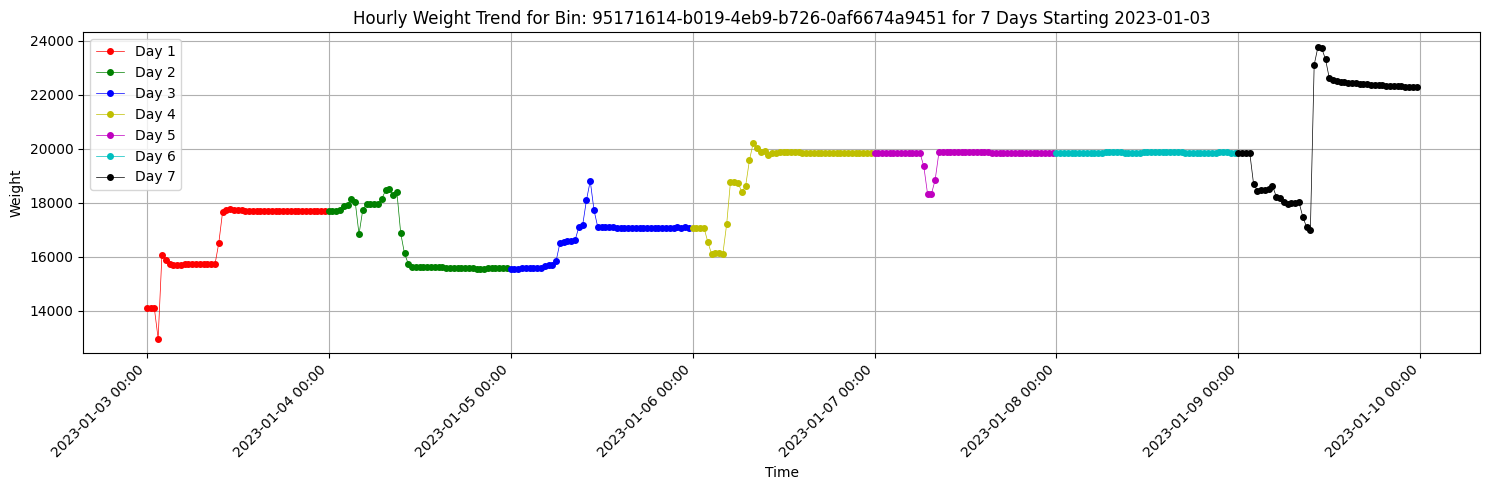

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Select a random bin 
random_bin = scale_records_clean['bin'].iloc[10]

# Define a function to filter and resample records for a given date
def get_daily_records(date):
    next_day = date + pd.Timedelta(days=1)
    one_day_records = scale_records_clean[(scale_records_clean['bin'] == random_bin) & 
                                (scale_records_clean['createdat'] >= date) & 
                                (scale_records_clean['createdat'] < next_day)]
    columns_to_include = ['weight']
    half_hour_intervals = one_day_records.set_index('createdat')[columns_to_include].resample('30T').mean()
    return half_hour_intervals

# Set the start date
start_date = pd.Timestamp('2023-01-03')
all_records = pd.concat([get_daily_records(start_date + pd.Timedelta(days=i)) for i in range(7)])

# Plotting
plt.figure(figsize=(15,5))

colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']

# Loop through each day and plot separately with different color
for i in range(7):
    daily_records = get_daily_records(start_date + pd.Timedelta(days=i))
    plt.plot(daily_records.index, daily_records['weight'], marker='o', linestyle='-', markersize=4, linewidth=0.5, label=f'Day {i+1}', color=colors[i])

plt.title(f"Hourly Weight Trend for Bin: {random_bin} for 7 Days Starting {start_date.date()}")
plt.xlabel('Time')
plt.ylabel('Weight')

# Formatting for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha='right')  # 'ha' adjusts the alignment of the datetime values

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## Error codes

- 99.27% of measurements have no error
-  0.68% of measurements are out of range
- 0.05% of measurements are unstable

In [70]:
# Check unique error codes
print(scale_records_clean['errorcode'].unique())


['NO_ERROR' 'OUT_OF_RANGE' 'UNSTABLE']


In [72]:
print(scale_records_clean['errorcode'].value_counts())
percentage_errors = scale_records_clean['errorcode'].value_counts(normalize=True) * 100
print("************************************************************************************************************************")
print(percentage_errors)

errorcode
NO_ERROR        15181858
OUT_OF_RANGE      104643
UNSTABLE            7753
Name: count, dtype: int64
************************************************************************************************************************
errorcode
NO_ERROR        99.265110
OUT_OF_RANGE     0.684198
UNSTABLE         0.050692
Name: proportion, dtype: float64


In [82]:
print(scale_records['hide'].value_counts())

hide
False    26765177
True       213947
Name: count, dtype: int64


In [83]:
percentage_errors = scale_records_clean['hide'].value_counts(normalize=True) * 100
print("************************************************************************************************************************")
print(percentage_errors)

************************************************************************************************************************
hide
False    99.267215
True      0.732785
Name: proportion, dtype: float64


## Distributions of battery levels and weight

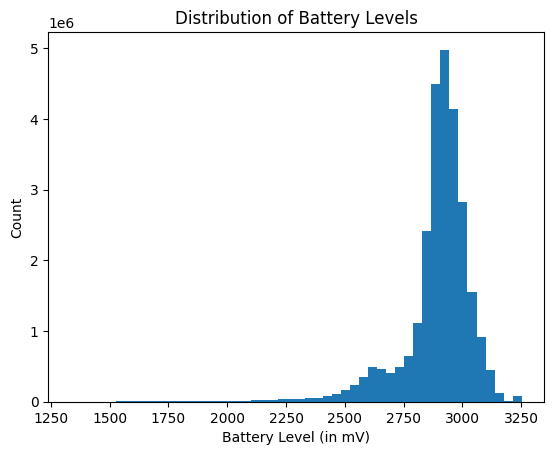

In [51]:
plt.hist(scale_records['battery'], bins=50)
plt.title('Distribution of Battery Levels')
plt.xlabel('Battery Level (in mV)')
plt.ylabel('Count')
plt.show()

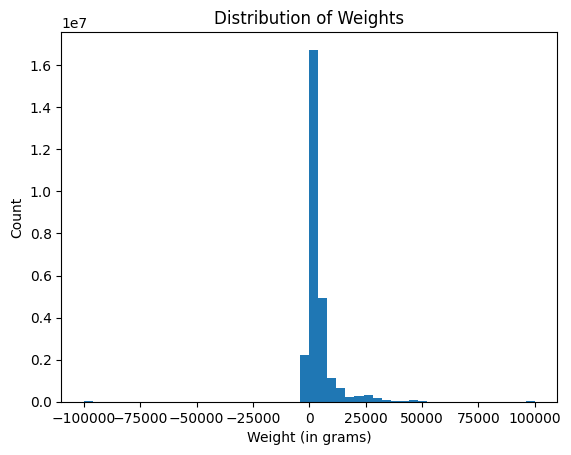

In [52]:
plt.hist(scale_records['weight'], bins=50)
plt.title('Distribution of Weights')
plt.xlabel('Weight (in grams)')
plt.ylabel('Count')
plt.show()


## Scales/bins mapping

In [67]:
unique_bins_count = scale_records_clean['iotid'].nunique()
print(f"There are {unique_bins_count} unique scales.")

unique_bins_count = scale_records_clean['bin'].nunique()
print(f"There are {unique_bins_count} unique bins.")

There are 1090 unique scales.
There are 1188 unique bins.


In [79]:
# Multiple scales to one bin

bin_iotid_counts = scale_records_clean.groupby('bin')['iotid'].nunique()
bins_with_multiple_iotids = bin_iotid_counts[bin_iotid_counts > 1]
num_bins_with_multiple_iotids = bins_with_multiple_iotids.count()

print(f"There are {num_bins_with_multiple_iotids} bins with multiple scales.")


There are 113 bins with multiple scales.


## Baseline estimation

In [29]:
import warnings

# Suppress specific FutureWarnings from Seaborn/Pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

### Example baseline estimation

/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

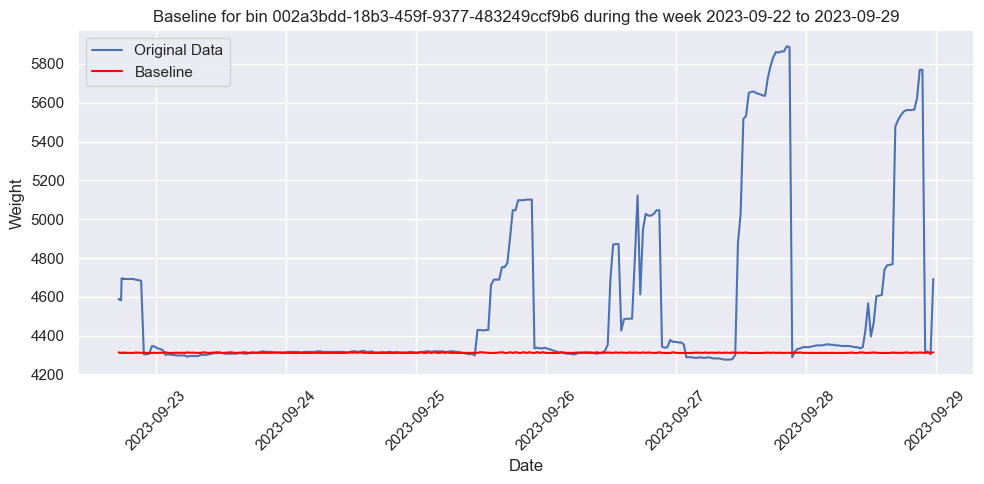

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import peakutils


# Filter the DataFrame for the specific bin
specific_bin_id = '002a3bdd-18b3-459f-9377-483249ccf9b6'
#specific_bin_id = scale_records_clean['bin'].iloc[100]
specific_bin_data = scale_records_clean[scale_records_clean['bin'] == specific_bin_id].copy()

specific_bin_data['createdat'] = pd.to_datetime(specific_bin_data['createdat'])
# Define the start and end dates
start_date = '2023-09-22'  
end_date = '2023-09-29'   

# Filter the data to include only the desired week and explicitly create a copy
week_data = specific_bin_data[(specific_bin_data['createdat'] >= start_date) & 
                              (specific_bin_data['createdat'] < end_date)].copy()

# Calculate the baseline for the specific bin's weight data
y = week_data['weight'].values
baseline_values = peakutils.baseline(y, deg=2)
#, max_it=100, tol=0.01)

# Add the baseline values to the DataFrame for plotting
week_data.loc[:, 'baseline'] = baseline_values

# Create a line plot with Seaborn
sns.set_theme(style="darkgrid")  # Set the theme for Seaborn plots

plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the original data
sns.lineplot(x='createdat', y='weight', data=week_data, label='Original Data')

# Plot the baseline
sns.lineplot(x='createdat', y='baseline', data=week_data, label='Baseline', color='red')

# Customize the plot
plt.title(f'Baseline for bin {specific_bin_id} during the week {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.xticks(rotation=45)  

plt.legend()
plt.tight_layout() 
plt.show()


## Fullness assessments

In [3]:
fullness_assessments = pd.read_csv("/Users/ishan/Downloads/fullness-assessments CCDS as of Oct 13 2023.csv",parse_dates=['date'])
scale_records = pd.read_csv("/Users/ishan/Downloads/Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv",parse_dates=['createdat','updatedat'])
scale_records_clean = scale_records.drop_duplicates()

In [58]:
fullness_assessments.head(5)

,bin,date,account,building,floor,stationName,binName,category,fullness
0,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-13 15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10
1,594843cf-7be5-4a8f-b6c6-c1dc1f1ee956,2023-09-13 15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BR,Mixed Recycling,20
2,65fdffd5-af50-4157-adfa-582251a1b27d,2023-09-13 15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BT,Trash,10
3,a8af7a97-eb80-4b93-93b7-b517b153e133,2023-09-13 15:18:31-04:00,BU CCDS,Center for Computing & Data Sciences,01,CCBU01B,CCBU01BC,Compost,10
4,684d7454-1c8f-48cf-832f-e4823b4edfe3,2023-09-13 15:18:31-04:00,BU CCDS,Center for Computing & Data Sciences,01,CCBU01B,CCBU01BR,Mixed Recycling,50


In [59]:
scale_records_clean.head()

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00,NaN,2023,1,2
1,2023-01-02 13:02:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00,NaN,2023,1,2
2,2023-01-02 13:53:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00,NaN,2023,1,2
3,2023-01-02 16:30:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00,NaN,2023,1,2
4,2023-01-02 16:39:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00,NaN,2023,1,2


In [50]:
print(fullness_assessments.shape)
print(scale_records_clean.shape)

(1129, 9)
(15294254, 12)


### All bins in fullness assessments are in scale_records

In [74]:
# Get unique bins from fullness_assessments
unique_bins_fullness = set(fullness_assessments['bin'].unique())

# Get unique bins from scale_records_clean
unique_bins_scale_records = set(scale_records_clean['bin'].unique())

# Find the intersection of both sets
common_bins = unique_bins_fullness.intersection(unique_bins_scale_records)

# Count the number of common bins
common_bins_count = len(common_bins)

print(f"There are {common_bins_count} bins in 'fullness_assessments' that are also present in 'scale_records'.")


There are 219 bins in 'fullness_assessments' that are also present in 'scale_records'.


### Converting dates to datetime

In [4]:
print(fullness_assessments['date'].dtype)
print(scale_records_clean['createdat'].dtype)

datetime64[ns, UTC-04:00]
datetime64[ns]


In [5]:
# Convert date columns to datetime format
fullness_assessments['date'] = pd.to_datetime(fullness_assessments['date']).dt.tz_localize(None).dt.floor('T')

# Convert 'updatedat' in scale_records_clean to datetime (if it's not already) and truncate to minute
scale_records_clean['updatedat'] = pd.to_datetime(scale_records_clean['updatedat']).dt.floor('T')

/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_138/3502987115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_records_clean['updatedat'] = pd.to_datetime(scale_records_clean['updatedat']).dt.floor('T')


In [6]:
print(fullness_assessments['date'].dtype)
print(scale_records_clean['createdat'].dtype)

datetime64[ns]
datetime64[ns]


### Merging fullness dataset with scale_records

In [7]:
# Sort the DataFrames by the date column
fullness_assessments.sort_values(by='date', inplace=True)
scale_records_clean.sort_values(by='createdat', inplace=True)

# Perform a nearest merge
merged_data = pd.merge_asof(
    scale_records_clean,
    fullness_assessments[['bin', 'date', 'fullness']],
    left_on='createdat',
    right_on='date',
    by='bin',
    direction='nearest',
    tolerance=pd.Timedelta(minutes=15)
)

# Reset index if needed and inspect the merged data
merged_data.reset_index(drop=True, inplace=True)


/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_138/2915456027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_records_clean.sort_values(by='createdat', inplace=True)


In [8]:
merged_data.shape

(15294254, 14)

In [9]:
merged_data.head(10)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness
0,2023-01-01 00:01:00,lora-000555,False,f607dcde-923c-4015-ba87-755fd806009d,NO_ERROR,3276.112001,3000.534066,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
1,2023-01-01 00:01:00,lora-000149,False,3db09f12-100f-4caf-84c5-7dbe5de67238,NO_ERROR,2330.052644,3046.005951,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
2,2023-01-01 00:01:00,lora-000056,False,8c9ae9cf-89ba-4dc4-95a6-cacba215b27a,NO_ERROR,1716.639963,2621.957733,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
3,2023-01-01 00:01:00,lora-000069,False,310d1ec9-b7f3-4c1b-9b18-666eca3bbeb5,NO_ERROR,7853.818570,2935.225452,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
4,2023-01-01 00:01:00,lora-000248,False,09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed,NO_ERROR,2754.253452,2633.096818,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
5,2023-01-01 00:01:00,lora-000067,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,18229.953460,2648.050660,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
6,2023-01-01 00:01:00,lora-000074,False,ee1b6d30-2cb4-47b3-b4dc-96198cf49a43,NO_ERROR,7832.455940,2978.255894,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
7,2023-01-01 00:01:00,lora-000607,False,2bd4d205-27b4-4d64-b223-b6613e0ffe8d,NO_ERROR,3678.950179,3038.986801,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
8,2023-01-01 00:01:00,lora-000128,False,3548bdbd-6a98-40f4-8c95-60ad2e104088,NO_ERROR,4640.268559,2905.622950,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
9,2023-01-01 00:01:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14097.810330,2615.091173,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN


In [57]:
merged_data[merged_data['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354'].tail(152)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness
15099291,2023-10-13 13:19:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7368.581674,2872.510872,2023-10-13 13:19:00,NaN,2023,10,13,NaT,NaN
15100571,2023-10-13 13:49:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7365.529870,2872.510872,2023-10-13 13:49:00,NaN,2023,10,13,NaT,NaN
15101842,2023-10-13 14:19:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7365.529870,2872.510872,2023-10-13 14:19:00,NaN,2023,10,13,2023-10-13 14:23:00,10.0
15103169,2023-10-13 14:49:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7368.581674,2872.510872,2023-10-13 14:49:00,NaN,2023,10,13,NaT,NaN
15104453,2023-10-13 15:19:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7368.581674,2875.104906,2023-10-13 15:19:00,NaN,2023,10,13,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288581,2023-10-16 14:59:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7228.198672,2869.611658,2023-10-16 14:59:00,NaN,2023,10,16,NaT,NaN
15289920,2023-10-16 15:30:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7231.250477,2871.747921,2023-10-16 15:30:00,NaN,2023,10,16,NaT,NaN
15291233,2023-10-16 16:00:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7231.250477,2871.747921,2023-10-16 16:00:00,NaN,2023,10,16,NaT,NaN
15292382,2023-10-16 16:30:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7228.198672,2871.747921,2023-10-16 16:30:00,NaN,2023,10,16,NaT,NaN


In [43]:
fullness_assessments[fullness_assessments['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354']

,bin,date,account,building,floor,stationName,binName,category,fullness
0,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-13 15:35:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10
411,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-29 14:40:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,30
616,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-05 13:21:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,30
1002,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-12 14:19:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10
1122,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-13 14:23:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10


In [10]:
merged_data['fullness'].notnull().sum()

1163

### Filter bins that have fullness values

In [11]:
bins_with_non_null_fullness = merged_data[merged_data['fullness'].notnull()]['bin'].unique()
bins_with_non_null_fullness.shape

(218,)

In [12]:
merged_data_filt = merged_data[merged_data['bin'].isin(bins_with_non_null_fullness)]
merged_data_filt.shape


(2823296, 14)

### Compute baseline for these bins

In [13]:
merged_data_filt['createdat'].min()

Timestamp('2023-01-18 14:59:00')

In [14]:
merged_data_filt['createdat'].max()

Timestamp('2023-10-16 17:43:00')

In [15]:
merged_data_filt

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness
498419,2023-01-18 14:59:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2049.286641,3161.516747,2023-01-18 14:59:00,NaN,2023,1,18,NaT,NaN
498438,2023-01-18 15:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2046.234836,3159.685664,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN
498447,2023-01-18 15:00:00,lora-000344,False,a6241564-5843-4d99-87d5-d7e90127ff1d,NO_ERROR,1826.504921,3157.701991,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN
498451,2023-01-18 15:00:00,lora-000602,False,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,NO_ERROR,2012.664988,3176.775769,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN
498494,2023-01-18 15:01:00,lora-000602,False,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,NO_ERROR,2012.664988,3176.165408,2023-01-18 15:01:00,NaN,2023,1,18,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294070,2023-10-16 17:36:00,lora-000537,False,904fc32a-f10a-4fcb-ab44-623508dbddf0,NO_ERROR,2436.865797,2894.789044,2023-10-16 17:36:00,NaN,2023,10,16,NaT,NaN
15294072,2023-10-16 17:36:00,lora-000296,False,c39e0b80-a937-4e51-887f-2050ae8558a1,NO_ERROR,1759.365225,2874.036774,2023-10-16 17:36:00,NaN,2023,10,16,NaT,NaN
15294083,2023-10-16 17:37:00,lora-000573,False,894413c2-93d3-44a0-86fe-b7a6ae81e648,NO_ERROR,2476.539254,2875.867857,2023-10-16 17:37:00,NaN,2023,10,16,NaT,NaN
15294110,2023-10-16 17:39:00,lora-000298,False,87ea5853-4cf9-4da2-9a71-bd7ee15430d9,NO_ERROR,6868.085756,2884.870680,2023-10-16 17:39:00,NaN,2023,10,16,NaT,NaN


In [16]:
import peakutils

# Sort the DataFrame by date
merged_data_filt.sort_values(by='createdat', inplace=True)

# Initialize a column for the rolling baseline
merged_data_filt['baseline_rolling'] = None

# Loop through each unique bin
for bin_id in merged_data_filt['bin'].unique():
    # Filter data for the current bin
    bin_data = merged_data_filt[merged_data_filt['bin'] == bin_id]

    # Calculate the baseline for the bin's weight data using peakutils
    baseline_values = peakutils.baseline(bin_data['weight'].values, deg=3)

    # Create a temporary DataFrame with dates and baseline values
    temp_df = pd.DataFrame({'createdat': bin_data['createdat'], 'baseline_peakutils': baseline_values})
    temp_df.set_index('createdat', inplace=True)

    # Calculate the rolling mean over a 30-day window on the baseline values
    temp_df['baseline_rolling'] = temp_df['baseline_peakutils'].rolling('15D').mean()

    # Update the main DataFrame
    merged_data_filt.loc[merged_data_filt['bin'] == bin_id, 'baseline_rolling'] = temp_df['baseline_rolling'].values


/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_138/3925312216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_filt.sort_values(by='createdat', inplace=True)
/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_138/3925312216.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_filt['baseline_rolling'] = None


In [17]:
merged_data_filt

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness,baseline_rolling
498419,2023-01-18 14:59:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2049.286641,3161.516747,2023-01-18 14:59:00,NaN,2023,1,18,NaT,NaN,1784.318244
498438,2023-01-18 15:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2046.234836,3159.685664,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN,1784.318278
498447,2023-01-18 15:00:00,lora-000344,False,a6241564-5843-4d99-87d5-d7e90127ff1d,NO_ERROR,1826.504921,3157.701991,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN,1664.825232
498451,2023-01-18 15:00:00,lora-000602,False,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,NO_ERROR,2012.664988,3176.775769,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN,1811.837892
498494,2023-01-18 15:01:00,lora-000602,False,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,NO_ERROR,2012.664988,3176.165408,2023-01-18 15:01:00,NaN,2023,1,18,NaT,NaN,1811.827453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294072,2023-10-16 17:36:00,lora-000296,False,c39e0b80-a937-4e51-887f-2050ae8558a1,NO_ERROR,1759.365225,2874.036774,2023-10-16 17:36:00,NaN,2023,10,16,NaT,NaN,1715.017359
15294070,2023-10-16 17:36:00,lora-000537,False,904fc32a-f10a-4fcb-ab44-623508dbddf0,NO_ERROR,2436.865797,2894.789044,2023-10-16 17:36:00,NaN,2023,10,16,NaT,NaN,1891.31918
15294083,2023-10-16 17:37:00,lora-000573,False,894413c2-93d3-44a0-86fe-b7a6ae81e648,NO_ERROR,2476.539254,2875.867857,2023-10-16 17:37:00,NaN,2023,10,16,NaT,NaN,1738.560097
15294110,2023-10-16 17:39:00,lora-000298,False,87ea5853-4cf9-4da2-9a71-bd7ee15430d9,NO_ERROR,6868.085756,2884.870680,2023-10-16 17:39:00,NaN,2023,10,16,NaT,NaN,5690.177041


### Example bin plot

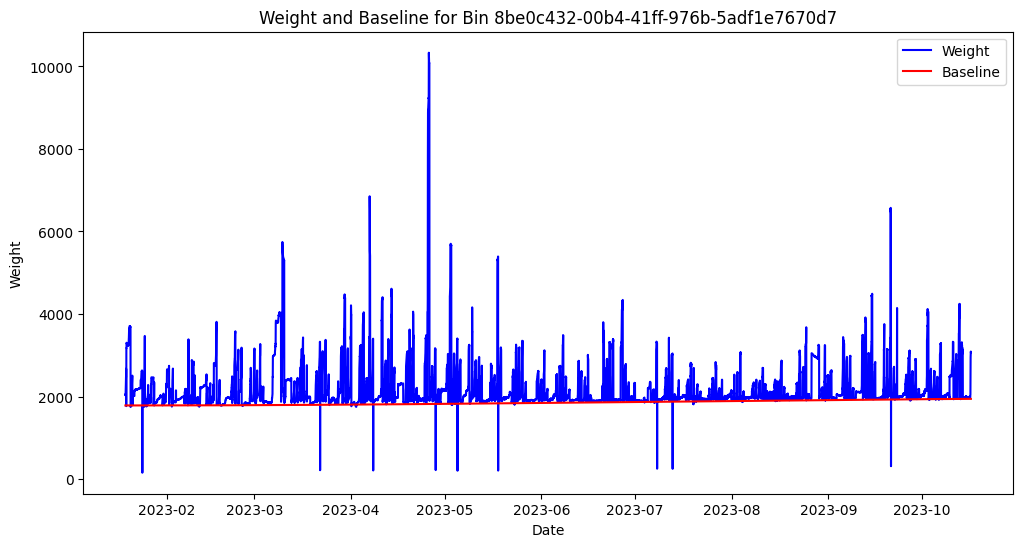

In [18]:
import matplotlib.pyplot as plt

# Replace 'your_bin_id' with the actual ID of the bin you want to plot
your_bin_id = '8be0c432-00b4-41ff-976b-5adf1e7670d7'

# Filter the DataFrame for the specific bin
specific_bin_data = merged_data_filt[merged_data_filt['bin'] == your_bin_id]

# Check if the bin has data to plot
if not specific_bin_data.empty:
    plt.figure(figsize=(12, 6))

    # Plotting weight
    plt.plot(specific_bin_data['createdat'], specific_bin_data['weight'], label='Weight', color='blue')

    # Plotting baseline
    plt.plot(specific_bin_data['createdat'], specific_bin_data['baseline_rolling'], label='Baseline', color='red')

    # Adding title and labels
    plt.title(f'Weight and Baseline for Bin {your_bin_id}')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend()

    plt.show()
else:
    print(f"No data available for bin {your_bin_id}")


/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_138/831365629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_bin_data['createdat'] = pd.to_datetime(specific_bin_data['createdat'])


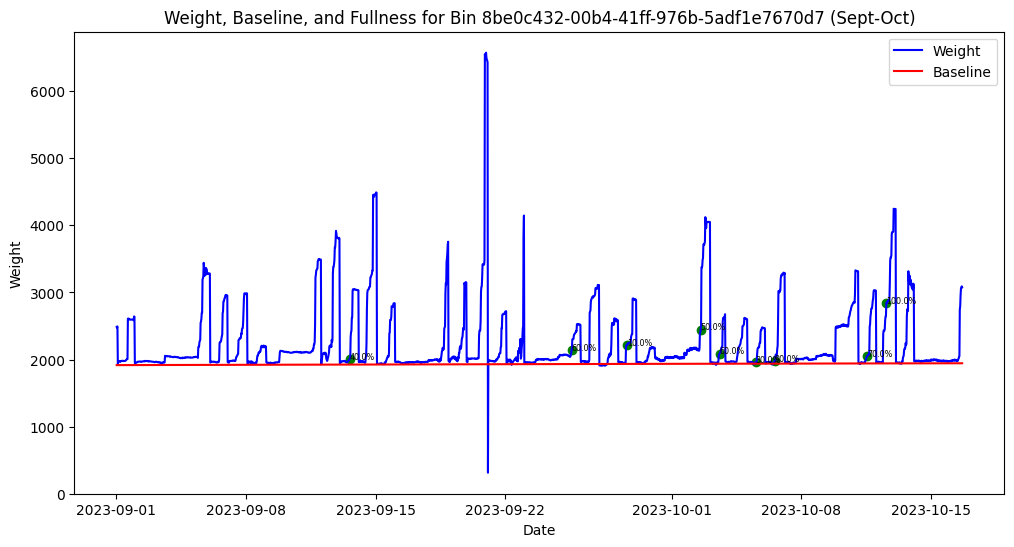

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'your_bin_id' with the actual ID of the bin you want to plot
your_bin_id = '8be0c432-00b4-41ff-976b-5adf1e7670d7'

# Filter the DataFrame for the specific bin
specific_bin_data = merged_data_filt[merged_data_filt['bin'] == your_bin_id]

# Convert 'createdat' to datetime and filter for September and October
specific_bin_data['createdat'] = pd.to_datetime(specific_bin_data['createdat'])
specific_bin_data = specific_bin_data.set_index('createdat')
specific_bin_data = specific_bin_data['2023-09':'2023-10'].reset_index()

# Check if the bin has data to plot
if not specific_bin_data.empty:
    plt.figure(figsize=(12, 6))

    # Plotting weight
    plt.plot(specific_bin_data['createdat'], specific_bin_data['weight'], label='Weight', color='blue')

    # Plotting baseline
    plt.plot(specific_bin_data['createdat'], specific_bin_data['baseline_rolling'], label='Baseline', color='red')

    # Marking only non-null fullness values
    for index, row in specific_bin_data.iterrows():
        if not pd.isna(row['fullness']):
            plt.scatter(row['createdat'], row['weight'], color='green')  # Marking fullness on the weight plot
            plt.text(row['createdat'], row['weight'], f'{row["fullness"]}%', horizontalalignment='left', size='xx-small', color='black')

    # Adding title and labels
    plt.title(f'Weight, Baseline, and Fullness for Bin {your_bin_id} (Sept-Oct)')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend()

    plt.show()
else:
    print(f"No data available for bin {your_bin_id}")


In [23]:
fullness_assessments[fullness_assessments['bin'] == '8be0c432-00b4-41ff-976b-5adf1e7670d7'][['date', 'fullness']]

,date,fullness
118,2023-09-13 14:17:00,40
190,2023-09-25 14:07:00,60
405,2023-09-28 14:06:00,10
460,2023-10-02 13:20:00,50
462,2023-10-03 13:55:00,60
607,2023-10-05 12:32:00,30
873,2023-10-06 13:24:00,90
883,2023-10-11 13:28:00,70
984,2023-10-12 14:05:00,100


In [60]:
pd.set_option('display.max_rows', None)
scale_records_clean[scale_records_clean['bin']=='8be0c432-00b4-41ff-976b-5adf1e7670d7'].tail(200)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
26861362,2023-10-12 12:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2586.404211,2895.399405,2023-10-12 12:30:00,NaN,2023,10,12
24221123,2023-10-12 13:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2641.336690,2895.399405,2023-10-12 13:00:00,NaN,2023,10,12
22959231,2023-10-12 13:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2644.388495,2895.399405,2023-10-12 13:30:00,NaN,2023,10,12
26362042,2023-10-12 14:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2842.755779,2895.399405,2023-10-12 14:00:00,NaN,2023,10,12
22694513,2023-10-12 14:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2845.807584,2897.383078,2023-10-12 14:30:00,NaN,2023,10,12
25821125,2023-10-12 15:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2842.755779,2897.383078,2023-10-12 15:00:00,NaN,2023,10,12
26505240,2023-10-12 15:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2867.170214,2897.383078,2023-10-12 15:30:00,NaN,2023,10,12
25645684,2023-10-12 16:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2873.273823,2897.383078,2023-10-12 16:00:00,NaN,2023,10,12
24591550,2023-10-12 16:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2873.273823,2895.704585,2023-10-12 16:30:00,NaN,2023,10,12
25694003,2023-10-12 17:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2885.481041,2895.704585,2023-10-12 17:00:00,NaN,2023,10,12


In [61]:
merged_data[merged_data['bin']=='8be0c432-00b4-41ff-976b-5adf1e7670d7'].tail(200)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness
15035479,2023-10-12 12:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2586.404211,2895.399405,2023-10-12 12:30:00,NaN,2023,10,12,NaT,NaN
15036754,2023-10-12 13:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2641.336690,2895.399405,2023-10-12 13:00:00,NaN,2023,10,12,NaT,NaN
15038036,2023-10-12 13:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2644.388495,2895.399405,2023-10-12 13:30:00,NaN,2023,10,12,NaT,NaN
15039326,2023-10-12 14:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2842.755779,2895.399405,2023-10-12 14:00:00,NaN,2023,10,12,2023-10-12 14:05:00,100.0
15040599,2023-10-12 14:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2845.807584,2897.383078,2023-10-12 14:30:00,NaN,2023,10,12,NaT,NaN
15041919,2023-10-12 15:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2842.755779,2897.383078,2023-10-12 15:00:00,NaN,2023,10,12,NaT,NaN
15043228,2023-10-12 15:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2867.170214,2897.383078,2023-10-12 15:30:00,NaN,2023,10,12,NaT,NaN
15044544,2023-10-12 16:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2873.273823,2897.383078,2023-10-12 16:00:00,NaN,2023,10,12,NaT,NaN
15045825,2023-10-12 16:30:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2873.273823,2895.704585,2023-10-12 16:30:00,NaN,2023,10,12,NaT,NaN
15047084,2023-10-12 17:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2885.481041,2895.704585,2023-10-12 17:00:00,NaN,2023,10,12,NaT,NaN


### Example bin plot 2

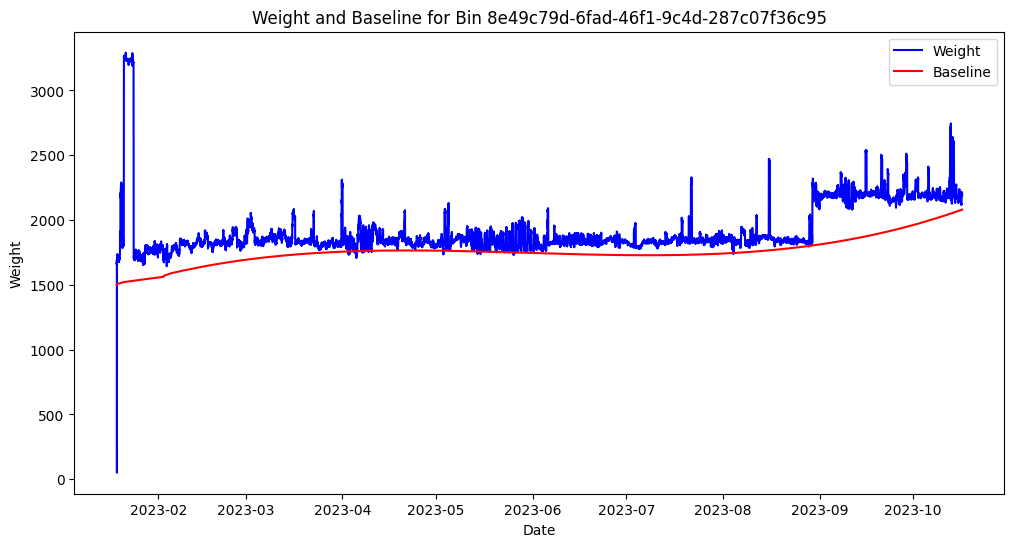

In [21]:
import matplotlib.pyplot as plt
import random

# Replace 'your_bin_id' with the actual ID of the bin you want to plot
#your_bin_id = random.choice(merged_data_filt['bin'].unique())
your_bin_id = '8e49c79d-6fad-46f1-9c4d-287c07f36c95'
# Filter the DataFrame for the specific bin
specific_bin_data = merged_data_filt[merged_data_filt['bin'] == your_bin_id]

# Check if the bin has data to plot
if not specific_bin_data.empty:
    plt.figure(figsize=(12, 6))

    # Plotting weight
    plt.plot(specific_bin_data['createdat'], specific_bin_data['weight'], label='Weight', color='blue')

    # Plotting baseline
    plt.plot(specific_bin_data['createdat'], specific_bin_data['baseline_rolling'], label='Baseline', color='red')

    # Adding title and labels
    plt.title(f'Weight and Baseline for Bin {your_bin_id}')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend()

    plt.show()
else:
    print(f"No data available for bin {your_bin_id}")


### Find the relationship between (weight-baseline) to fullness

In [25]:
merged_data_clean = merged_data_filt.dropna(subset=['fullness'])
merged_data_clean.shape

(1163, 15)

In [27]:
merged_data_clean['weight_minus_baseline'] = merged_data_clean['weight'] - merged_data_clean['baseline_rolling']

/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_37818/3784137460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['weight_minus_baseline'] = merged_data_clean['weight'] - merged_data_clean['baseline_rolling']


In [28]:
correlation = merged_data_clean['weight_minus_baseline'].corr(merged_data_clean['fullness'])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.014118488018361576


In [42]:
#

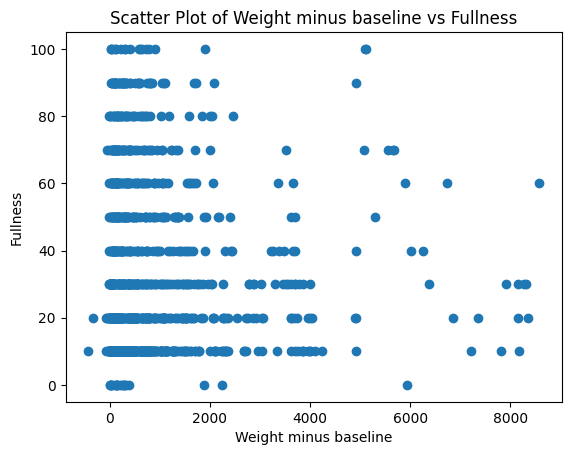

In [39]:
import matplotlib.pyplot as plt

# Scatter plot of weight vs fullness
plt.scatter(merged_data_clean['weight_minus_baseline'], merged_data_clean['fullness'])
plt.xlabel('Weight minus baseline')
plt.ylabel('Fullness')
plt.title('Scatter Plot of Weight minus baseline vs Fullness')
plt.show()
